In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Step 1: Simulated Telematics Dataset
data = {
    'avg_speed': np.random.normal(50, 10, 1000),
    'harsh_braking': np.random.poisson(2, 1000),
    'rapid_accel': np.random.poisson(1, 1000),
    'night_driving_pct': np.random.uniform(0, 1, 1000),
    'mileage_per_day': np.random.normal(30, 5, 1000),
    'accident_risk_score': np.random.normal(50, 15, 1000)  # Simulated target
}

In [4]:
df = pd.DataFrame(data)

In [5]:
# Step 2: Preprocess
df = df[(df >= 0).all(axis=1)]  # Remove invalid (negative) values

X = df.drop('accident_risk_score', axis=1)
y = df['accident_risk_score']

In [6]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Step 5: Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 265.58


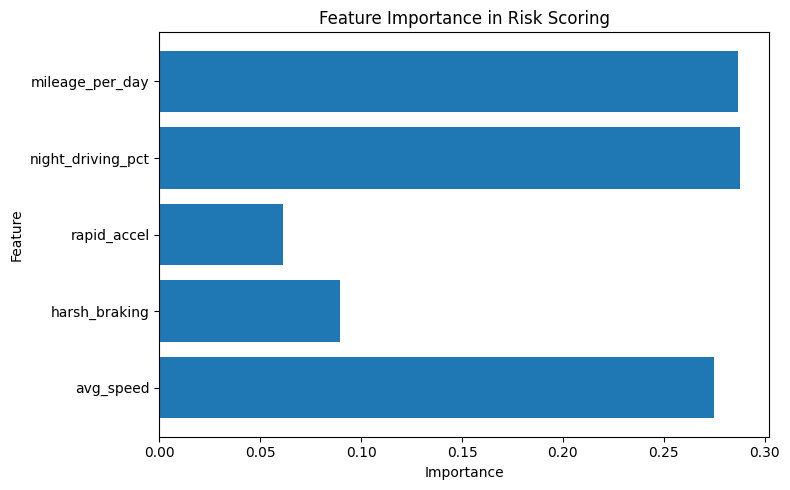

In [9]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("Feature Importance in Risk Scoring")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [10]:
# Sample usage for dashboard backend:
def calculate_risk_score(driver_features):
    '''driver_features: dict with keys as feature names'''
    input_df = pd.DataFrame([driver_features])
    score = model.predict(input_df)[0]
    return round(score, 2)


In [11]:
# Example input:
example_driver = {
    'avg_speed': 55,
    'harsh_braking': 3,
    'rapid_accel': 2,
    'night_driving_pct': 0.3,
    'mileage_per_day': 35
}


In [12]:
print("Predicted Risk Score:", calculate_risk_score(example_driver))

Predicted Risk Score: 50.33
